# 数据清洗

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# 读取抓取数据
pants_data = pd.read_csv('../DataSet/men pants.csv')

In [135]:
# 删除重复数据
pants_data.drop_duplicates(keep='first', inplace=True)

In [136]:
# 删除不相关列数据
pants_data.drop(['BuyBox', 'Review Velocity', 'Dimensions', 'Weight', 'Images'], axis=1, inplace=True)

In [137]:
# 删除短裤、套装的数据
pants_data.drop(pants_data[(pants_data['Title'].str.contains('Short')) | (pants_data['Title'].str.contains('Set'))].index, inplace=True)

In [138]:
# 填充空值
pants_data['Fulfillment '].fillna(value='FBA', inplace=True)
pants_data['Size Tier'].fillna(value='Large Standard-Size', inplace=True)
pants_data.fillna(value=0, inplace=True)

In [139]:
# 清洗‘($) ’脏符号
pants_data['Brand'] = pants_data['Brand'].apply(lambda x: x.replace('($) ', ''))
pants_data['Title'] = pants_data['Title'].apply(lambda x: x.replace('($) ', ''))

In [140]:
# 数据清洗完成
pants_data.head()

,ASIN,Brand,Title,Category,Fulfillment,Price,FBA fee,Sales,Revenue,BSR,Rating,Review Count,Size Tier,Listing Creation Date
0,B08BLF5471,Clothin,Clothin Men's Sweatpant with Zipper Pockets El...,($) Sports & Outdoors,FBA,20.99,0.0,0.0,0.00,9193.0,4.5,230,Large Standard-Size,03/02/2020
1,B01L9H7M5I,Hanes,Hanes Sport Men's X-Temp Performance Training ...,"Clothing, Shoes & Jewelry",AMZ,13.99,6.0,28195.0,394448.05,190.0,4.5,4670,Large Standard-Size,09/20/2016
2,B00719XLJU,Russell Athletic,Russell Athletic Men's Dri-Power Open Bottom S...,"Clothing, Shoes & Jewelry",AMZ,24.45,9.0,26653.0,651665.85,437.0,4.5,8399,Large Standard-Size,11/07/2019
3,B08GYX6S1K,czzstance,CZZSTANCE Men's Sweatpants Cotton Jogger Pants...,"Clothing, Shoes & Jewelry",FBA,20.79,9.0,3066.0,63742.14,1631.0,4.5,154,Large Standard-Size,08/29/2020
4,B01IE1OI2M,Champion,Champion Men's Powerblend Open Bottom Fleece Pant,Sports & Outdoors,AMZ,40.00,12.0,10735.0,429400.00,438.0,4.5,5066,Large Standard-Size,07/13/2016


# 数据分析

## 市场趋势

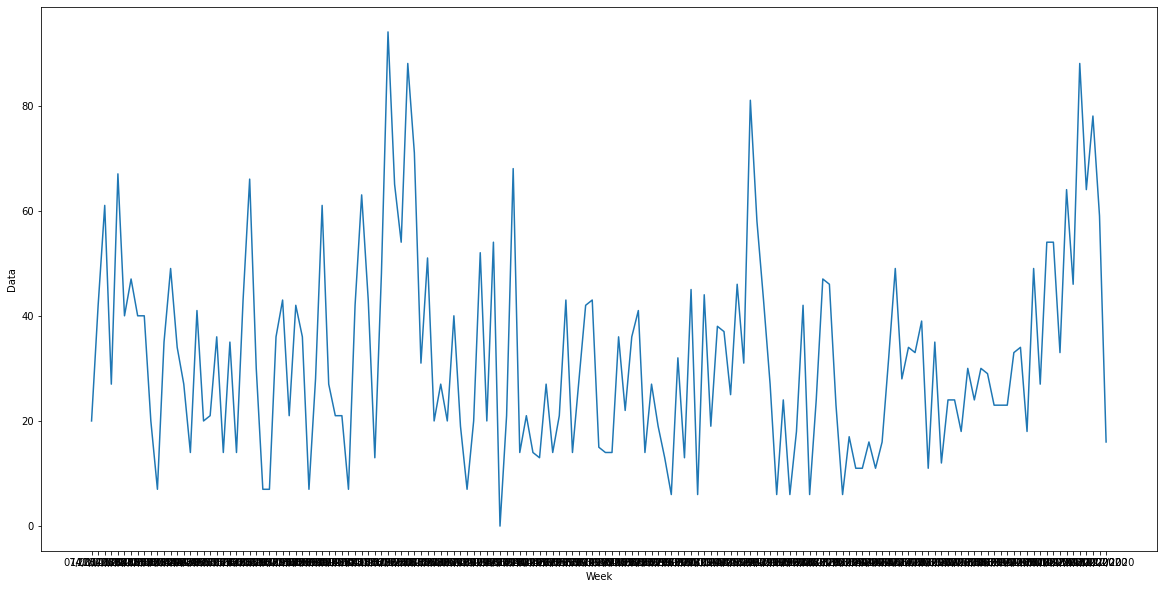

In [158]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='Week', y='Data', data=pd.read_csv('/Users/yves/Desktop/multiTimeline.csv'))
plt.show()

根据谷歌数据趋势，3年来男士休闲裤市场呈现随季节波动的趋势，总体市场容量大，有较大的市场机会。

根据数据显示，男士休闲裤秋冬季节处于旺季，市场需求旺盛，而夏季搜索量最小，季节性比较明显。

## 品牌数量

In [148]:
len(pants_data['Brand'].unique())/pants_data.shape[0]

0.3291139240506329

样本总量632，其中，休闲裤的品牌总计208个，比率是32.9%，说明男士休闲裤市场中，各品牌充分竞争，销量前100总共有66个品牌，这表明瑜伽裤市场中品牌充分竞争，并无品牌壁垒或垄断情况。

## 价格区间

In [164]:
pants_data[pants_data['Price']>0]['Price'].describe()

count    626.000000
mean      30.212716
std       12.667807
min        0.510000
25%       22.990000
50%       26.990000
75%       34.875000
max      105.430000
Name: Price, dtype: float64

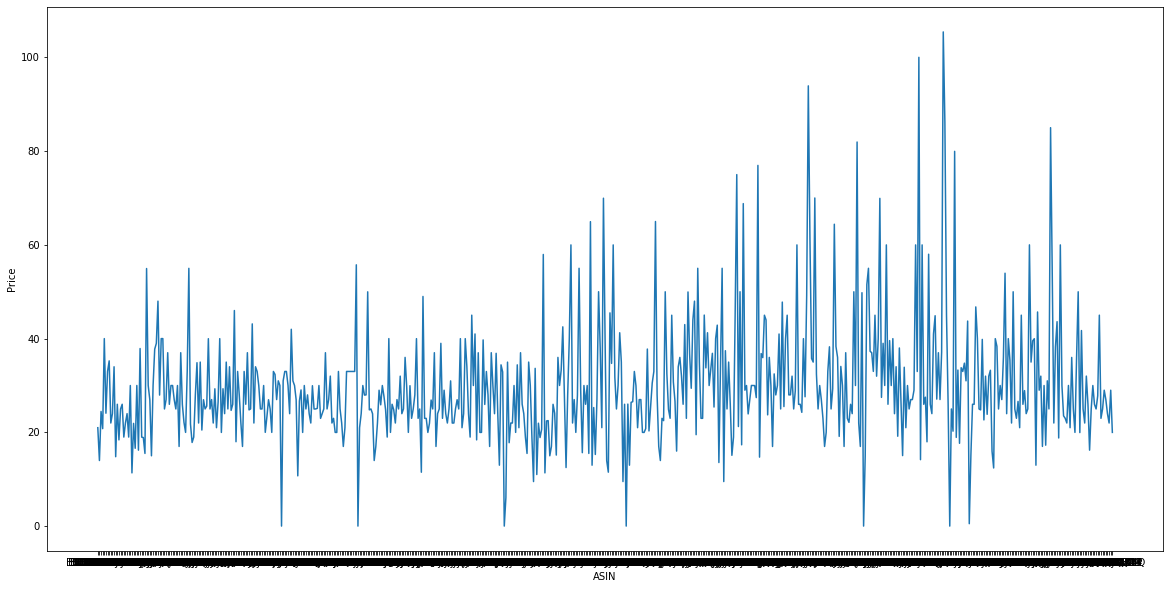

In [165]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='ASIN', y='Price', data=pants_data[['ASIN', 'Price']])
plt.show()

数据显示，平均价格是30.2美金，且绝大多数卖家售价处于26~35美金区间，成本控制合理的前期下，纯利润能保持在35%左右。

## 发货类型

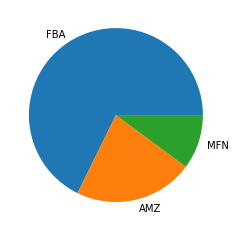

In [179]:
fulfillment_type = pants_data['Fulfillment '].value_counts()
plt.pie(x = fulfillment_type.values, labels=fulfillment_type.index)
plt.show()

70%的卖家选择以FBA作为配送方式，同时也有约10%的卖家选择自发货方式，需注意的是，该品类下，亚马逊自营占据20%左右。

## 评论与星级

In [183]:
pants_data[pants_data['Rating']>0]['Rating'].describe()

count    583.000000
mean       4.343053
std        0.419436
min        1.000000
25%        4.000000
50%        4.500000
75%        4.500000
max        5.000000
Name: Rating, dtype: float64

In [185]:
pants_data[pants_data['Review Count']>0]['Review Count'].describe()

count      583.000000
mean      1756.283019
std       3932.308457
min          1.000000
25%         60.500000
50%        256.000000
75%       1335.500000
max      36484.000000
Name: Review Count, dtype: float64

In [ ]:
数据显示星级方面，各卖家基本处于4.3星左右；在数量方面，卖家差异极大，有3万多的卖家也有1星卖家，初步反映出市场并未完全被垄断。

## 服装面料

In [189]:
pants_data['Title'].str.contains('Fleece').sum()/pants_data.shape[0]

0.27531645569620256

In [192]:
pants_data[pants_data['Title'].str.contains('Fleece')]['Sales'].sum()/pants_data['Sales'].sum()

0.41945315567610014

In [ ]:
数据显示，有27%的卖家提供的产品属于加绒秋冬款，其销量占据全部卖家销量的41.9%。